In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
import os

# Get the directory of the current notebook
current_dir = os.path.dirname(os.path.abspath('../scripts')) 

# Add the 'scripts' directory to the Python path
scripts_dir = os.path.join(current_dir, 'scripts')
sys.path.append(scripts_dir)

# import from data_utils
from data_utils import load_data, column_summary

In [3]:
# Load data 
file_path = r'C:\Users\Maintenant prêt\Desktop\PROJECTS\Project5\Data\train.csv' 
df = load_data(file_path) 

In [4]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# Call column_summary function
summary_df = column_summary(df) 
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values
0,Store,int64,0,1017209,1115
1,DayOfWeek,int64,0,1017209,7
2,Date,object,0,1017209,942
3,Sales,int64,0,1017209,21734
4,Customers,int64,0,1017209,4086
5,Open,int64,0,1017209,2
6,Promo,int64,0,1017209,2
7,StateHoliday,object,0,1017209,5
8,SchoolHoliday,int64,0,1017209,2


In [6]:
# Define a dictionary to map old column names to new column names
new_column_names = {
    'Store': 'store_id',
    'DayOfWeek': 'day_of_week',
    'Date': 'date',
    'Sales': 'sales',
    'Customers': 'customers',
    'Open': 'store_open', 
    'Promo': 'promotion',
    'StateHoliday': 'state_holiday',
    'SchoolHoliday': 'school_holiday'
}

# Rename the columns using the dictionary
df.rename(columns=new_column_names, inplace=True)


In [7]:
df.head()

,store_id,day_of_week,date,sales,customers,store_open,promotion,state_holiday,school_holiday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
# Checking for summary statistics and duplicates
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
print(df.head())
print(df.describe())
print(df.duplicated().sum())

   store_id  day_of_week        date  sales  customers  store_open  promotion state_holiday  school_holiday
0         1            5  2015-07-31   5263        555           1          1             0               1
1         2            5  2015-07-31   6064        625           1          1             0               1
2         3            5  2015-07-31   8314        821           1          1             0               1
3         4            5  2015-07-31  13995       1498           1          1             0               1
4         5            5  2015-07-31   4822        559           1          1             0               1
           store_id   day_of_week         sales     customers    store_open     promotion  school_holiday
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06    1.017209e+06
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01  3.815145e-01    1.786467e-01
std    3.219087e+02  1.997391e+00 

## Relationshiph between Sales and Customer

In [9]:
# calling store data
file_path = r'C:\Users\Maintenant prêt\Desktop\PROJECTS\Project5\Data\store.csv' 
store_df = load_data(file_path) 

In [10]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
# for convinence rename the columns

store_df.rename(columns={
    'Store': 'store_id',
    'StoreType': 'store_type',
    'Assortment': 'assortment_level',
    'CompetitionDistance': 'competition_distance_m', 
    'CompetitionOpenSinceMonth': 'competition_opened_month',
    'CompetitionOpenSinceYear': 'competition_opened_year',
    'Promo2': 'promo_active', 
    'Promo2SinceWeek': 'promo2_start_week',
    'Promo2SinceYear': 'promo2_start_year',
    'PromoInterval': 'promo_interval'
}, inplace=True)

In [12]:
store_df.head()

,store_id,store_type,assortment_level,competition_distance_m,competition_opened_month,competition_opened_year,promo_active,promo2_start_week,promo2_start_year,promo_interval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [13]:
# merging store df with training df
store_train_df = pd.merge(store_df, df, on='store_id', how='left')

In [17]:
store_train_df.head()

,store_id,store_type,assortment_level,competition_distance_m,competition_opened_month,competition_opened_year,promo_active,promo2_start_week,promo2_start_year,promo_interval,day_of_week,date,sales,customers,store_open,promotion,state_holiday,school_holiday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [15]:
store_train_df.shape

(1017209, 18)

In [18]:
# fill the missing values
store_train_df['competition_opened_month'] = store_train_df['competition_opened_month'].fillna(0)
store_train_df['competition_opened_year'] = store_train_df['competition_opened_year'].fillna(0)
store_train_df['promo2_start_week'] = store_train_df['promo2_start_week'].fillna(0)
store_train_df['promo2_start_year'] = store_train_df['promo2_start_year'].fillna(0)
store_train_df['promo_interval'] = store_train_df['promo_interval'].fillna('0') 

In [21]:
store_train_df.isna().sum()

store_id                       0
store_type                     0
assortment_level               0
competition_distance_m      2642
competition_opened_month       0
competition_opened_year        0
promo_active                   0
promo2_start_week              0
promo2_start_year              0
promo_interval                 0
day_of_week                    0
date                           0
sales                          0
customers                      0
store_open                     0
promotion                      0
state_holiday                  0
school_holiday                 0
dtype: int64

In [22]:
mean_distance = store_train_df['competition_distance_m'].mean()
store_train_df['competition_distance_m'].fillna(mean_distance, inplace=True)

In [23]:
store_train_df.isna().sum()

store_id                    0
store_type                  0
assortment_level            0
competition_distance_m      0
competition_opened_month    0
competition_opened_year     0
promo_active                0
promo2_start_week           0
promo2_start_year           0
promo_interval              0
day_of_week                 0
date                        0
sales                       0
customers                   0
store_open                  0
promotion                   0
state_holiday               0
school_holiday              0
dtype: int64

In [24]:
df['customers'].unique()

array([ 555,  625,  821, ..., 3900,   36, 4065], shape=(4086,))

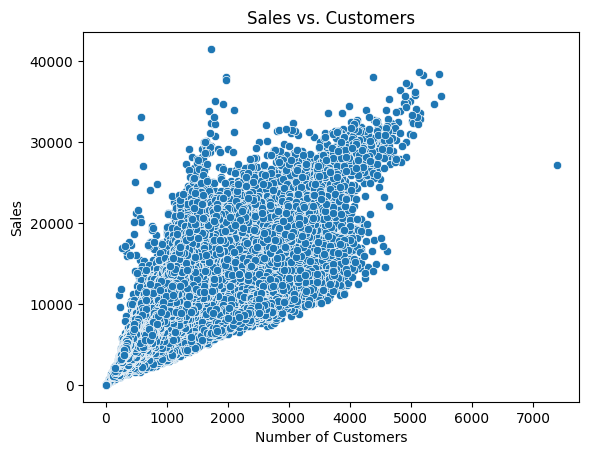

In [26]:
# Create a scatter plot
sns.scatterplot(x='customers', y='sales', data=store_train_df, palette='viridis')

# Customize the plot
plt.title('Sales vs. Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')

# Show the plot
plt.show()

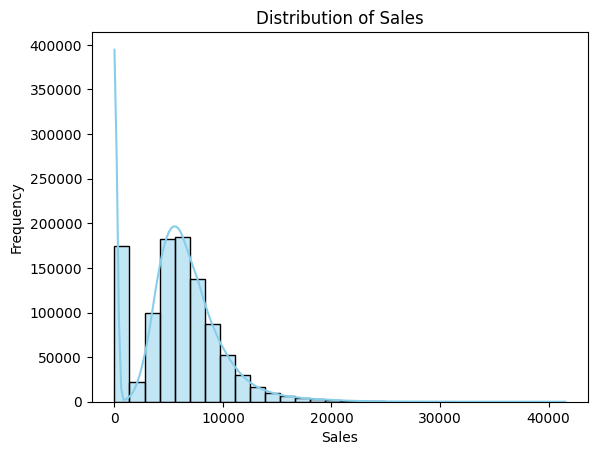

In [29]:
# Create a histogram of sales
sns.histplot(store_train_df['sales'], bins=30, kde=True, color='skyblue') 

# Customize the plot
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Show the plot
plt.show()

## Relationship between Promotion and Sales

In [32]:
store_train_df.columns

Index(['store_id', 'store_type', 'assortment_level', 'competition_distance_m', 'competition_opened_month', 'competition_opened_year', 'promo_active', 'promo2_start_week', 'promo2_start_year', 'promo_interval', 'day_of_week', 'date', 'sales', 'customers', 'store_open', 'promotion', 'state_holiday', 'school_holiday'], dtype='object')

In [38]:
# Calculate average sales during promotions and non-promotions
avg_sales_promo = store_train_df[store_train_df['promotion'] == 1]['sales'].mean()
avg_sales_no_promo = store_train_df[store_train_df['promotion'] == 0]['sales'].mean()

print(f"Average Sales during Promotion: {avg_sales_promo:.2f}")
print(f"Average Sales without Promotion: {avg_sales_no_promo:.2f}")



Average Sales during Promotion: 7991.15
Average Sales without Promotion: 4406.05


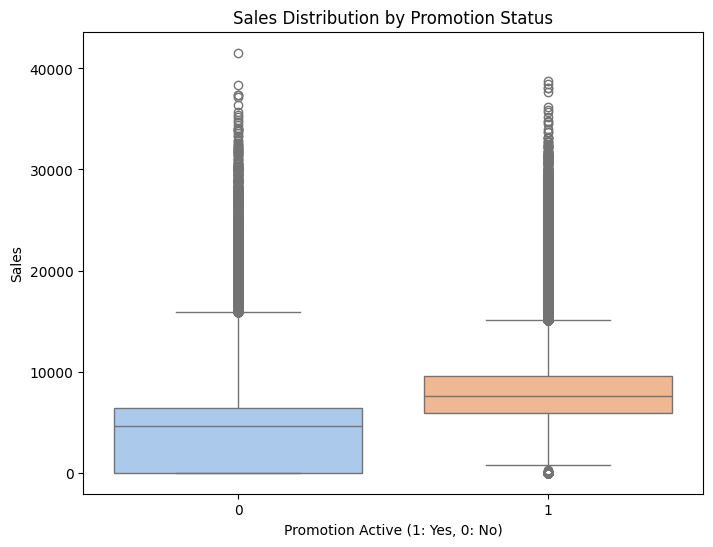

In [40]:
# Create a boxplot to visualize sales distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='promotion', y='sales', data=store_train_df, palette='pastel')
plt.title('Sales Distribution by Promotion Status')
plt.xlabel('Promotion Active (1: Yes, 0: No)')
plt.ylabel('Sales')
plt.show()



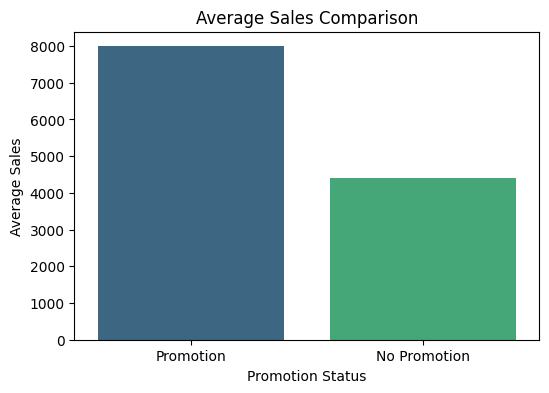

In [41]:
# Create a bar plot to compare average sales
plt.figure(figsize=(6, 4))
sns.barplot(x=['Promotion', 'No Promotion'], y=[avg_sales_promo, avg_sales_no_promo], palette='viridis')
plt.title('Average Sales Comparison')
plt.xlabel('Promotion Status')
plt.ylabel('Average Sales')
plt.show()

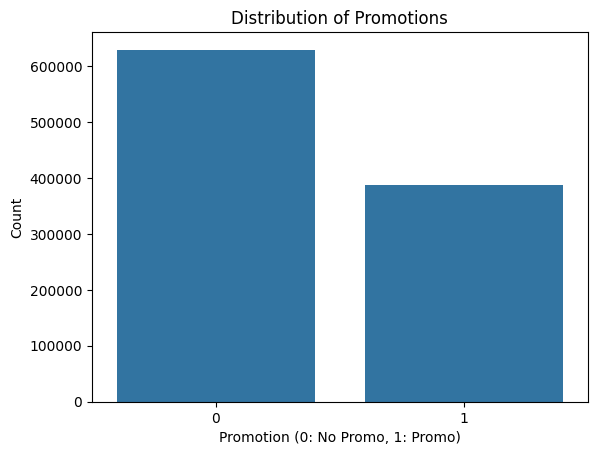

In [9]:
# Create the countplot for 'promotion'
sns.countplot(x='promotion', data=df)

# Customize the plot
plt.title('Distribution of Promotions')
plt.xlabel('Promotion (0: No Promo, 1: Promo)')
plt.ylabel('Count')

# Show the plot
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   store_id        1017209 non-null  int64 
 1   day_of_week     1017209 non-null  int64 
 2   date            1017209 non-null  object
 3   sales           1017209 non-null  int64 
 4   customers       1017209 non-null  int64 
 5   store_open      1017209 non-null  int64 
 6   promotion       1017209 non-null  int64 
 7   state_holiday   1017209 non-null  object
 8   school_holiday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


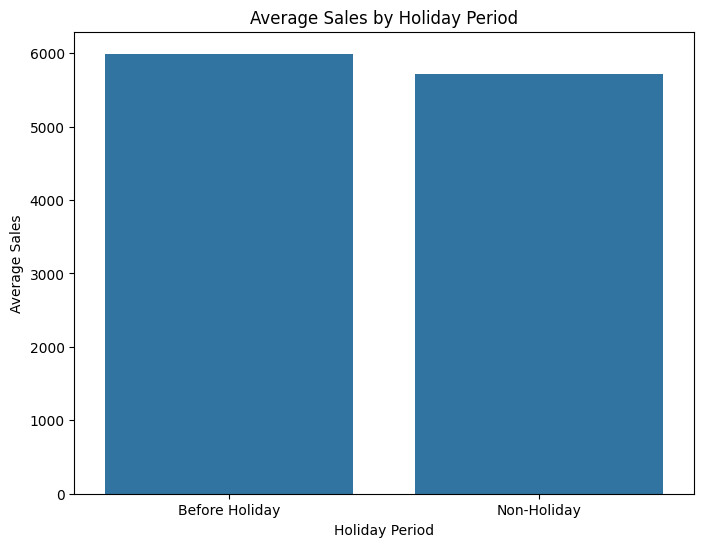

In [10]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a new column 'holiday' combining StateHoliday and SchoolHoliday
df['holiday'] = df['state_holiday'].astype(str) + df['school_holiday'].astype(str)
df['holiday'] = df['holiday'].apply(lambda x: 'Holiday' if x != '00' else 'No Holiday')

# Define a function to categorize days based on holiday status
def categorize_days(row):
    if row['holiday'] == 'Holiday':
        if row['date'] < pd.to_datetime(row['date']).date() + pd.DateOffset(days=3):  # Days before holiday
            return 'Before Holiday'
        elif row['date'] == pd.to_datetime(row['date']).date():  # Holiday day
            return 'Holiday'
        else:
            return 'After Holiday'
    else:
        return 'Non-Holiday'

# Apply the function to create a new column 'holiday_period'
df['holiday_period'] = df.apply(categorize_days, axis=1)

# Calculate average sales for each holiday period
avg_sales_by_period = df.groupby('holiday_period')['sales'].mean()

# Create a bar plot to compare average sales
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_sales_by_period.index, y=avg_sales_by_period.values)
plt.title('Average Sales by Holiday Period')
plt.xlabel('Holiday Period')
plt.ylabel('Average Sales')
plt.show()

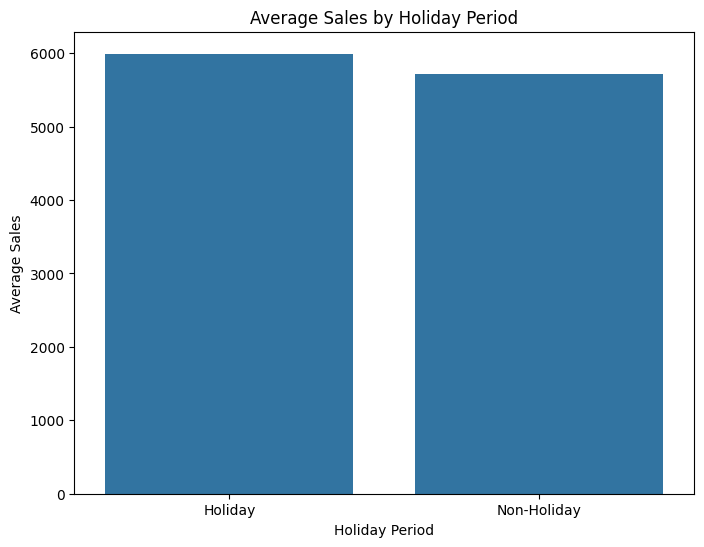

In [11]:
# Create a new column 'holiday' combining StateHoliday and SchoolHoliday
df['holiday'] = df['state_holiday'].astype(str) + df['school_holiday'].astype(str)
df['holiday'] = df['holiday'].apply(lambda x: 'Holiday' if x != '00' else 'No Holiday')

# Calculate average sales during holidays
avg_sales_holiday = df[df['holiday'] == 'Holiday']['sales'].mean()

# Calculate average sales on non-holiday days
avg_sales_non_holiday = df[df['holiday'] == 'No Holiday']['sales'].mean()

# Create a DataFrame for plotting
data = {'Holiday Period': ['Holiday', 'Non-Holiday'], 'Average Sales': [avg_sales_holiday, avg_sales_non_holiday]}
plot_df = pd.DataFrame(data)

# Create a bar plot to compare average sales
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday Period', y='Average Sales', data=plot_df)
plt.title('Average Sales by Holiday Period')
plt.xlabel('Holiday Period')
plt.ylabel('Average Sales')
plt.show()

In [18]:

# Create a new column 'holiday' combining StateHoliday and SchoolHoliday
df['holiday'] = df['state_holiday'].astype(str) + df['school_holiday'].astype(str)
df['holiday'] = df['holiday'].apply(lambda x: 'Holiday' if x != '00' else 'No Holiday')

# Calculate average sales during holidays
avg_sales_holiday = df[df['holiday'] == 'Holiday']['sales'].mean()

# Calculate average sales on non-holiday days
avg_sales_non_holiday = df[df['holiday'] == 'No Holiday']['sales'].mean()

# Print the average sales
print(f"Average Sales during Holidays: {avg_sales_holiday:.2f}")
print(f"Average Sales on Non-Holiday Days: {avg_sales_non_holiday:.2f}")

Average Sales during Holidays: 5992.80
Average Sales on Non-Holiday Days: 5721.14


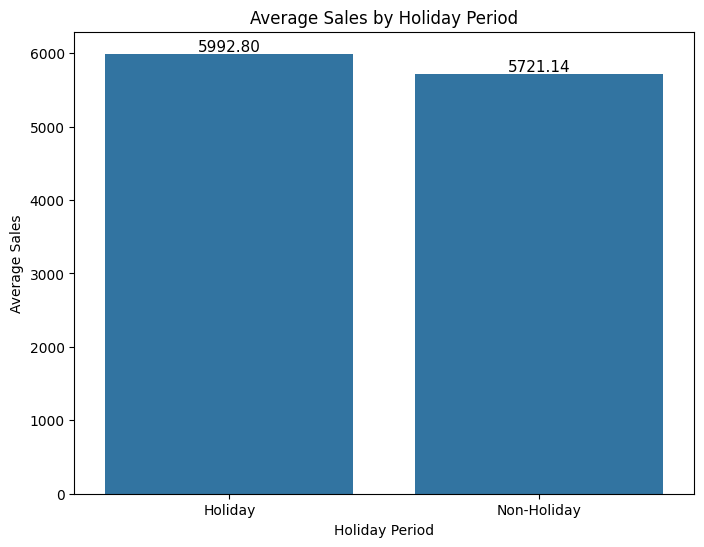

In [19]:
# Create a new column 'holiday' combining StateHoliday and SchoolHoliday
df['holiday'] = df['state_holiday'].astype(str) + df['school_holiday'].astype(str)
df['holiday'] = df['holiday'].apply(lambda x: 'Holiday' if x != '00' else 'No Holiday')

# Calculate average sales during holidays
avg_sales_holiday = df[df['holiday'] == 'Holiday']['sales'].mean()

# Calculate average sales on non-holiday days
avg_sales_non_holiday = df[df['holiday'] == 'No Holiday']['sales'].mean()

# Create a DataFrame for plotting
data = {'Holiday Period': ['Holiday', 'Non-Holiday'], 'Average Sales': [avg_sales_holiday, avg_sales_non_holiday]}
plot_df = pd.DataFrame(data)

# Create a bar plot to compare average sales
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Holiday Period', y='Average Sales', data=plot_df)

# Annotate the bars with the average sales values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Average Sales by Holiday Period')
plt.xlabel('Holiday Period')
plt.ylabel('Average Sales')
plt.show()

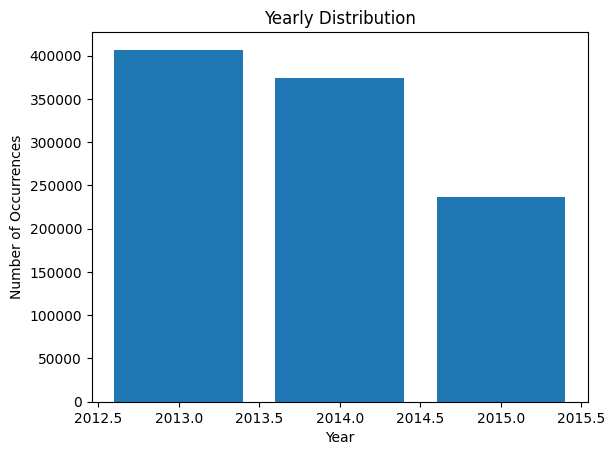

In [21]:
# Extract year
df['Year'] = df['date'].dt.year

# Plot yearly distribution
plt.bar(df['Year'].value_counts().index, df['Year'].value_counts())
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.title('Yearly Distribution')
plt.show()

In [23]:
from datetime import date, timedelta

# Assuming your DataFrame is named 'df'

# Convert 'Date' column to datetime format
df['date'] = pd.to_datetime(df['Date'])

# Define a function to identify holiday seasons
def is_holiday_season(date):
    """
    Checks if the given date falls within a major holiday season.

    Args:
        date: Date object

    Returns:
        str: 'Holiday Season' if the date falls within a holiday season, 
             'Non-Holiday Season' otherwise.
    """
    year = date.year
    # Christmas (December 20th - December 31st)
    if (date.month == 12) and (date.day >= 20):
        return 'Christmas'

    # Easter (dynamic calculation)
    # Calculate Easter Sunday using the Meeus/Jones/Butcher algorithm
    a = year // 19
    b = year % 19
    c = (a - (a // 4) - ((a - (a + 1) // 4) + 2 * b + 4 * b // 5 + 5) // 3) + 19 * a // 4) % 30
    d = (c + 1) // 29
    e = (2 * d + a // 11) // 1
    f = (c - d + e + 2 * b + 4 * b // 5 + 5) // 3
    g = (f + 1) // 7
    h = (c - d + e + 2 * b + 4 * b // 5 - f + g) // 31
    i = (h + 10) // 11
    j = (c - d + e + 2 * b + 4 * b // 5 - f + g + 7 * i + 114) // 31
    month = 3 + (j + i - 9) // 12
    day = 28 + (j + i - 9) % 12
    easter_sunday = date(year, month, day)

    # Define Easter season (e.g., one week before and after Easter Sunday)
    easter_start = easter_sunday - timedelta(days=7)
    easter_end = easter_sunday + timedelta(days=7)
    if easter_start <= date <= easter_end:
        return 'Easter'

    return 'Non-Holiday Season'

# Apply the function to create a new column
df['Season'] = df['date'].apply(is_holiday_season)

# Calculate average sales for each season
avg_sales_by_season = df.groupby('Season')['Sales'].mean()

# Create a bar plot to compare average sales
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_sales_by_season.index, y=avg_sales_by_season.values)
plt.title('Average Sales by Season')
plt.xlabel('Season')
plt.ylabel('Average Sales')
plt.show()

SyntaxError: unmatched ')' (1091867338.py, line 29)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta

# Assuming your DataFrame is named 'df'

# Convert 'Date' column to datetime format
#df['date'] = pd.to_datetime(df['date'])

# Define a function to identify holiday seasons
def is_holiday_season(date):
    """
    Checks if the given date falls within a major holiday season.

    Args:
        date: Date object

    Returns:
        str: 'Holiday Season' if the date falls within a holiday season, 
             'Non-Holiday Season' otherwise.
    """
    year = date.year
    # Christmas (December 20th - December 31st)
    if (date.month == 12) and (date.day >= 20):
        return 'Christmas'

    # Easter (dynamic calculation)
    # Calculate Easter Sunday using the Meeus/Jones/Butcher algorithm
    a = year // 19
    b = year % 19
    c = (a - (a // 4) - ((a - (a + 1) // 4) + 2 * b + 4 * b // 5 + 5) // 3) + 19 * a // 4 % 30
    d = (c + 1) // 29
    e = (2 * d + a // 11) // 1
    f = (c - d + e + 2 * b + 4 * b // 5 + 5) // 3
    g = (f + 1) // 7
    h = (c - d + e + 2 * b + 4 * b // 5 - f + g) // 31
    i = (h + 10) // 11
    j = (c - d + e + 2 * b + 4 * b // 5 - f + g + 7 * i + 114) // 31
    month = 3 + (j + i - 9) // 12
    day = 28 + (j + i - 9) % 12
    easter_sunday = date(year, month, day)

    # Define Easter season (e.g., one week before and after Easter Sunday)
    easter_start = easter_sunday - timedelta(days=7)
    easter_end = easter_sunday + timedelta(days=7)
    if easter_start <= date <= easter_end:
        return 'Easter'

    return 'Non-Holiday Season'

# Apply the function to create a new column
df['Season'] = df['date'].apply(is_holiday_season)

# Calculate average sales for each season
avg_sales_by_season = df.groupby('Season')['Sales'].mean()

# Create a bar plot to compare average sales
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_sales_by_season.index, y=avg_sales_by_season.values)
plt.title('Average Sales by Season')
plt.xlabel('Season')
plt.ylabel('Average Sales')
plt.show()

TypeError: 'Timestamp' object is not callable

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta

# Assuming your DataFrame is named 'df'

# Convert 'Date' column to datetime format
#df['date'] = pd.to_datetime(df['Date'])

# Define a function to identify holiday seasons
def is_holiday_season(date_obj):
    """
    Checks if the given date falls within a major holiday season.

    Args:
        date_obj: DateTime object

    Returns:
        str: 'Holiday Season' if the date falls within a holiday season,
             'Non-Holiday Season' otherwise.
    """
    year = date_obj.year
    # Christmas (December 20th - December 31st)
    if (date_obj.month == 12) and (date_obj.day >= 20):
        return 'Christmas'

    # Easter (dynamic calculation)
    # Calculate Easter Sunday using the Meeus/Jones/Butcher algorithm
    a = year // 19
    b = year % 19
    c = (a - (a // 4) - ((a - (a + 1) // 4) + 2 * b + 4 * b // 5 + 5) // 3) + 19 * a // 4 % 30
    d = (c + 1) // 29
    e = (2 * d + a // 11) // 1
    f = (c - d + e + 2 * b + 4 * b // 5 + 5) // 3
    g = (f + 1) // 7
    h = (c - d + e + 2 * b + 4 * b // 5 - f + g) // 31
    i = (h + 10) // 11
    j = (c - d + e + 2 * b + 4 * b // 5 - f + g + 7 * i + 114) // 31
    month = 3 + (j + i - 9) // 12
    day = 28 + (j + i - 9) % 12
    easter_sunday = date(year, month, day)

    # Define Easter season (e.g., one week before and after Easter Sunday)
    easter_start = easter_sunday - timedelta(days=7)
    easter_end = easter_sunday + timedelta(days=7)
    if easter_start <= date_obj <= easter_end:
        return 'Easter'

    return 'Non-Holiday Season'

# Apply the function to create a new column
df['Season'] = df['date'].apply(is_holiday_season)

# Calculate average sales for each season
avg_sales_by_season = df.groupby('Season')['Sales'].mean()

# Create a bar plot to compare average sales
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_sales_by_season.index, y=avg_sales_by_season.values)
plt.title('Average Sales by Season')
plt.xlabel('Season')
plt.ylabel('Average Sales')
plt.show()

ValueError: day is out of range for month